# Effects of different factors on borrower annual percentage rate
## by Pavel Averin

## Investigation Overview

In this presentation, I wanted to look at different factors that may affect a borrower's annual percentage rate.  
I picked five variables that I believe may cause a significant impact on the rate: credit score, original loan amount, possession of the property, loan term, and income range.

## Dataset Overview

The original dataset included 113 937 rows and 81 columns. I dropped columns that will not be used in my investigation and removed some rows with inconsistent or missing values.  
The original data set contained two variables representing credit scores. One for the lower range and the other for the upper range. I took the upper limit and applied FICO (one of the most popular agencies that provide credit scores) categories.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData_clean.csv')
print(loans.info())
loans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103155 entries, 0 to 103154
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BorrowerAPR             103155 non-null  float64
 1   Term                    103155 non-null  int64  
 2   EmploymentStatus        103155 non-null  object 
 3   IsBorrowerHomeowner     103155 non-null  bool   
 4   CreditScoreRangeLower   103155 non-null  float64
 5   CreditScoreRangeUpper   103155 non-null  float64
 6   DebtToIncomeRatio       103155 non-null  float64
 7   IncomeRange             97688 non-null   object 
 8   IncomeVerifiable        103155 non-null  bool   
 9   StatedMonthlyIncome     103155 non-null  float64
 10  LoanOriginalAmount      103155 non-null  int64  
 11  LoanOriginationQuarter  103155 non-null  object 
 12  CreditScore             103155 non-null  object 
dtypes: bool(2), float64(5), int64(2), object(4)
memory usage: 8.9+ MB
None


,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,CreditScore
0,0.16516,36,Self-employed,True,640.0,659.0,0.17,"$25,000-49,999",True,3083.333333,9425,Q3 2007,Fair
1,0.12016,36,Employed,False,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,10000,Q1 2014,Good
2,0.28269,36,Not available,False,480.0,499.0,0.06,NaN,True,2083.333333,3001,Q1 2007,Very Poor
3,0.12528,36,Employed,True,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,10000,Q4 2012,Excellent
4,0.24614,36,Employed,True,680.0,699.0,0.26,"$100,000+",True,9583.333333,15000,Q3 2013,Good


In [3]:
income_list = ['$1-24,999', '$25,000-49,999', '$50,000-74,999',
               '$75,000-99,999', '$100,000+']
v_income = pd.api.types.CategoricalDtype(ordered = True, categories = income_list)
loans['IncomeRange'] = loans['IncomeRange'].astype(v_income)
score_list = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
v_score = pd.api.types.CategoricalDtype(ordered = True, categories = score_list)
loans['CreditScore'] = loans['CreditScore'].astype(v_score)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103155 entries, 0 to 103154
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   BorrowerAPR             103155 non-null  float64 
 1   Term                    103155 non-null  int64   
 2   EmploymentStatus        103155 non-null  object  
 3   IsBorrowerHomeowner     103155 non-null  bool    
 4   CreditScoreRangeLower   103155 non-null  float64 
 5   CreditScoreRangeUpper   103155 non-null  float64 
 6   DebtToIncomeRatio       103155 non-null  float64 
 7   IncomeRange             97688 non-null   category
 8   IncomeVerifiable        103155 non-null  bool    
 9   StatedMonthlyIncome     103155 non-null  float64 
 10  LoanOriginalAmount      103155 non-null  int64   
 11  LoanOriginationQuarter  103155 non-null  object  
 12  CreditScore             103155 non-null  category
dtypes: bool(2), category(2), float64(5), int64(2), object(2)
me

In [5]:
#Set up styles for the graphs globally
sb.set_style('whitegrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=13)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=11)    # legend fontsize
plt.rc('font', size=1)  

## Distribution of Borrower's Annual Percentage Rate

The distribution of Borrower's annual percentage rate is multimodal slightly skewed to the right. There is a peak between 35.5% and 36%. 4904 observations fall in this range, which makes 4.75% of all entries.

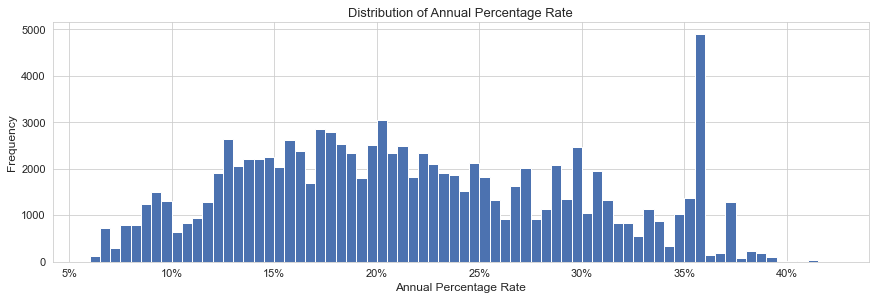

In [6]:
#Create Histogram
plt.figure(figsize=(12,4), tight_layout=True)
base_color=sb.color_palette('deep')
bins = np.arange(0.06, 0.42 + 0.01, 0.005)
plt.hist(data = loans, x = 'BorrowerAPR', bins = bins, color = base_color[0])
ticks = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
labels = ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']
plt.title('Distribution of Annual Percentage Rate');
plt.ylabel('Frequency')
plt.xlabel('Annual Percentage Rate')
plt.xlim(0.042,0.44)
plt.xticks(ticks, labels);

In [7]:
from scipy.stats import skewnorm

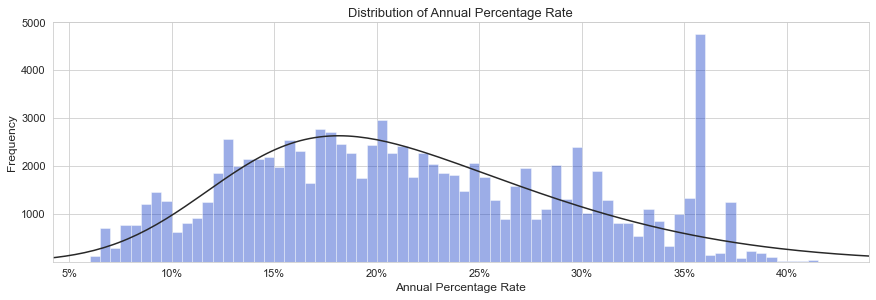

In [8]:
#Create Histogram
plt.figure(figsize=(12,4), tight_layout=True)
bins = np.arange(0.06, 0.42 + 0.01, 0.005)
sb.distplot(loans['BorrowerAPR'], bins = bins, color = '#0832C3', kde = False, fit = skewnorm)
xticks = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]
xlabels = ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']
yticks = [2, 4, 6, 8, 10]
ylabels = [1000, 2000, 3000, 4000, 5000]
plt.title('Distribution of Annual Percentage Rate');
plt.ylabel('Frequency')
plt.xlabel('Annual Percentage Rate');
plt.xlim(0.042,0.44)
plt.yticks(yticks, ylabels);
plt.xticks(xticks, xlabels);

In [9]:
pick = loans.query('BorrowerAPR >= 0.355 & BorrowerAPR < 0.36 ')
print(pick.shape[0])
pick

4904


,BorrowerAPR,Term,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationQuarter,CreditScore
15,0.35797,36,Other,True,700.0,719.0,0.49,"$50,000-74,999",True,5500.000000,4000,Q2 2012,Good
31,0.35797,36,Other,False,680.0,699.0,0.04,"$25,000-49,999",True,2250.000000,2000,Q3 2012,Good
65,0.35843,12,Employed,False,600.0,619.0,0.28,"$50,000-74,999",True,4777.000000,3000,Q2 2011,Fair
68,0.35797,36,Employed,True,760.0,779.0,0.53,"$25,000-49,999",True,2916.666667,2774,Q4 2012,Very Good
71,0.35643,36,Employed,True,680.0,699.0,0.21,"$50,000-74,999",True,5314.250000,2500,Q1 2011,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103038,0.35643,36,Employed,True,640.0,659.0,0.21,"$50,000-74,999",True,5000.000000,4000,Q2 2011,Fair
103061,0.35643,36,Employed,False,680.0,699.0,0.45,"$25,000-49,999",True,2250.000000,7500,Q1 2011,Good
103071,0.35898,36,Full-time,True,640.0,659.0,0.17,"$75,000-99,999",True,6250.000000,1000,Q4 2010,Fair
103099,0.35643,36,Employed,False,640.0,659.0,0.18,"$25,000-49,999",True,2708.333333,3000,Q2 2011,Fair


## Credit Score vs Annual Percentage Rate

Green line represents median, upper grey dashed line represents 75% quartile, lower grey dashed line represents 25% quartile.
A credit score depicts a borrower's creditworthiness. The interaction effect between categories of credit score and annual percentage rate is visible on the bar chart below. A better credit score is associated with a lower percentage rate while a worse credit score is associated with a higher percentage rate. 

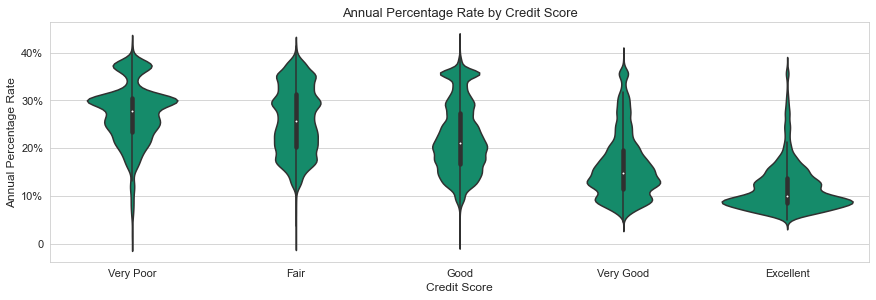

In [10]:
#Create a violin plot
plt.figure(figsize=(12,4), tight_layout=True)
color = sb.color_palette('colorblind')
sb.violinplot(data = loans, x = 'CreditScore', y = 'BorrowerAPR', color = color[2])
ticks = [0, 0.10, 0.20, 0.30, 0.40]
labels = [0, '10%', '20%', '30%', '40%']
plt.ylabel('Annual Percentage Rate');
plt.xlabel('Credit Score');
plt.title('Annual Percentage Rate by Credit Score')
plt.yticks(ticks, labels);

In [11]:
score_max = loans.groupby('CreditScore')['BorrowerAPR'].max().reset_index()
score_median = loans.groupby('CreditScore')['BorrowerAPR'].median().reset_index()
score_75 = loans.groupby('CreditScore')['BorrowerAPR'].quantile(.75).reset_index()
score_25 = loans.groupby('CreditScore')['BorrowerAPR'].quantile(.25).reset_index()
score_median

,CreditScore,BorrowerAPR
0,Very Poor,0.27767
1,Fair,0.25757
2,Good,0.21166
3,Very Good,0.14857
4,Excellent,0.09988


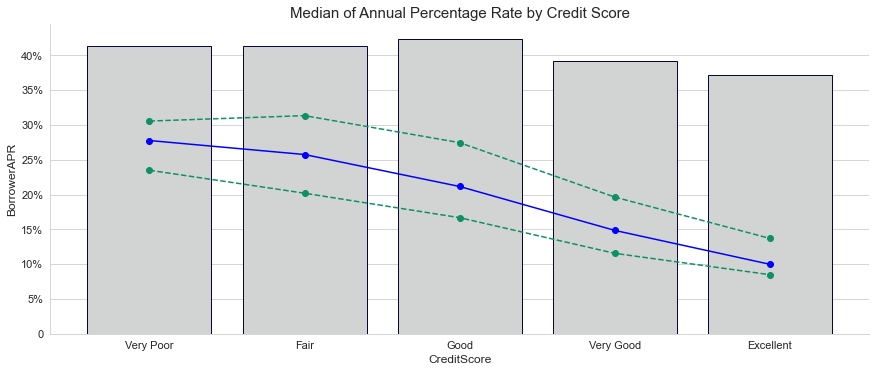

In [12]:
#Create a barplot
sb.set_style('whitegrid')
plt.figure(figsize=(12,5), tight_layout=True)
color = sb.color_palette('pastel')
def loans_median(cat, title, x_var):
    sb.barplot(data = cat, x = x_var, y = 'BorrowerAPR', ci = None, color = '#D2D4D3', edgecolor = '#070440')
    ticks = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
    labels = [0, '5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%', '45%', '50%']
    plt.yticks(ticks, labels)
    plt.title(title, fontsize = 15)
    sb.despine(top=True, right=True, left=False, bottom=False)
#    plt.tick_params(left = False, labelleft = False)
#    plt.ylabel('')
loans_median(cat = score_max,
             title = 'Median of Annual Percentage Rate by Credit Score',
            x_var = 'CreditScore')
sb.lineplot(data = score_median, x = 'CreditScore', y = 'BorrowerAPR', color = '#0100FF')
sb.lineplot(data = score_75, x = 'CreditScore', y = 'BorrowerAPR', linestyle='--', color = '#0D9164')
sb.lineplot(data = score_25, x = 'CreditScore', y = 'BorrowerAPR', linestyle='--', color = '#0D9164');
colors = ['#0D9164', '#0100FF']
def points(x, c):
    for i, m in zip(x.BorrowerAPR, range(x.shape[0])):
        plt.plot(m, i, 'o', color = c)
points(score_median, colors[1])
points(score_75, colors[0])
points(score_25, colors[0])

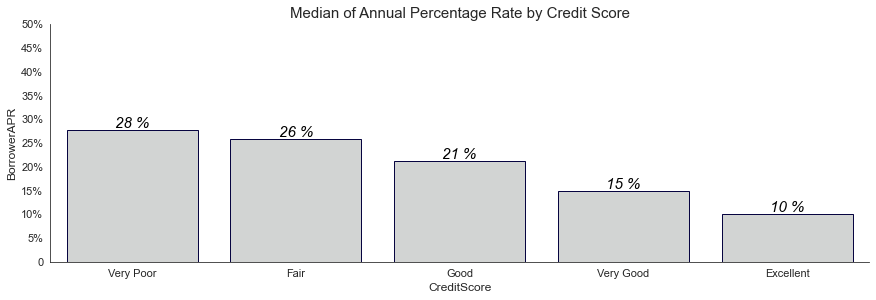

In [13]:
#Create a barplot
sb.set_style('white')
plt.figure(figsize=(12,4), tight_layout=True)
score_median = loans.groupby('CreditScore')['BorrowerAPR'].median().reset_index()
color = sb.color_palette('pastel')
def text(median):
    for i in range(median.shape[0]):
        pct_string = '{:0.0f} %'.format(median.BorrowerAPR[i] * 100)
        plt.text(i, median.BorrowerAPR[i]+0.005, pct_string, ha='center', color = 'black', fontsize=15, style='italic')
loans_median(cat = score_median,
             title = 'Median of Annual Percentage Rate by Credit Score',
            x_var = 'CreditScore')
text(median = score_median)


## Home ownership, Term, Income Range vs Borrower Annual Percentage Rate

Green line represents median, upper grey dashed line represents 75% quartile, lower grey dashed line represents 25% quartile.
Below are the series of barplots. Each barplot depicts relationsthips between choosen variable and median of borrower APR. For homeowners percentage rate will be slightly lower than for non-homeowners. Terms are divided into three categories: 12, 36, and 60 months. The median percentage rate for all three categories does not change. Income range is a factor that affects an annual percentage rate. Where the income of a borrower is lower, percentage rate will be higher and wise versa.

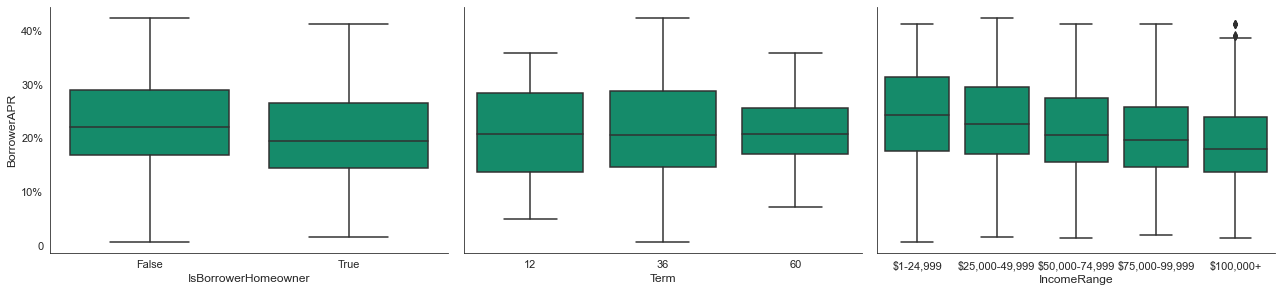

In [14]:
#Create box plots
base_color = sb.color_palette('colorblind')
categoric_vars = ['IsBorrowerHomeowner', 'Term', 'IncomeRange']
g = sb.PairGrid(data = loans, y_vars = 'BorrowerAPR', x_vars = categoric_vars,
                height = 4, aspect = 1.5)
g.map(sb.boxplot, color = base_color[2]);
ticks = [0, 0.10, 0.20, 0.30, 0.40]
labels = [0, '10%', '20%', '30%', '40%']
plt.yticks(ticks, labels);

In [15]:
home_median = loans.groupby('IsBorrowerHomeowner')['BorrowerAPR'].median().reset_index()
term_median = loans.groupby('Term')['BorrowerAPR'].median().reset_index()
income_median = loans.groupby('IncomeRange')['BorrowerAPR'].median().reset_index()

home_max = loans.groupby('IsBorrowerHomeowner')['BorrowerAPR'].max().reset_index()
term_max = loans.groupby('Term')['BorrowerAPR'].max().reset_index()
income_max = loans.groupby('IncomeRange')['BorrowerAPR'].max().reset_index()

home_75 = loans.groupby('IsBorrowerHomeowner')['BorrowerAPR'].quantile(.75).reset_index()
term_75 = loans.groupby('Term')['BorrowerAPR'].quantile(.75).reset_index()
income_75 = loans.groupby('IncomeRange')['BorrowerAPR'].quantile(.75).reset_index()

home_25 = loans.groupby('IsBorrowerHomeowner')['BorrowerAPR'].quantile(.25).reset_index()
term_25 = loans.groupby('Term')['BorrowerAPR'].quantile(.25).reset_index()
income_25 = loans.groupby('IncomeRange')['BorrowerAPR'].quantile(.25).reset_index()

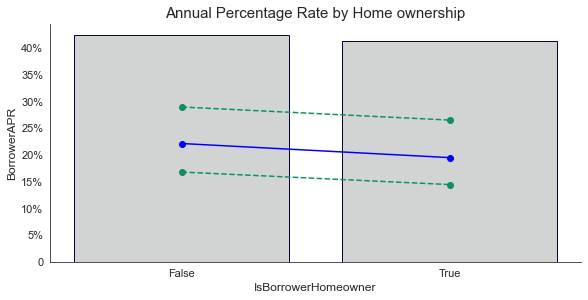

In [16]:
plt.figure(figsize=(8,4), tight_layout=True)
loans_median(cat = home_max,
             title = 'Annual Percentage Rate by Home ownership',
            x_var = 'IsBorrowerHomeowner')
sb.lineplot(data = home_median, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', color = '#0100FF')
sb.lineplot(data = home_75, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', linestyle='--', color = '#0D9164')
sb.lineplot(data = home_25, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR', linestyle='--', color = '#0D9164');
points(home_median, colors[1])
points(home_75, colors[0])
points(home_25, colors[0])

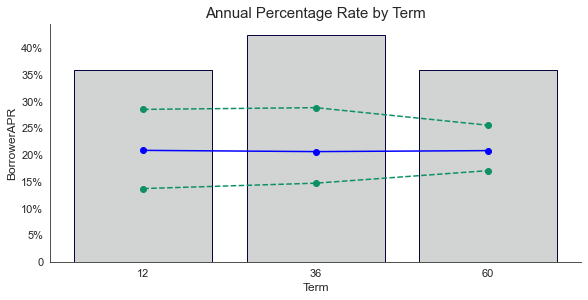

In [17]:
plt.figure(figsize=(8,4), tight_layout=True)
loans_median(cat = term_max,
             title = 'Annual Percentage Rate by Term',
            x_var = 'Term')
sb.lineplot(data = term_median, x = range(3), y = 'BorrowerAPR', color = '#0100FF')
sb.lineplot(data = term_75, x = range(3), y = 'BorrowerAPR', linestyle='--', color = '#0D9164')
sb.lineplot(data = term_25, x = range(3), y = 'BorrowerAPR', linestyle='--', color = '#0D9164');
points(term_median, colors[1])
points(term_75, colors[0])
points(term_25, colors[0])

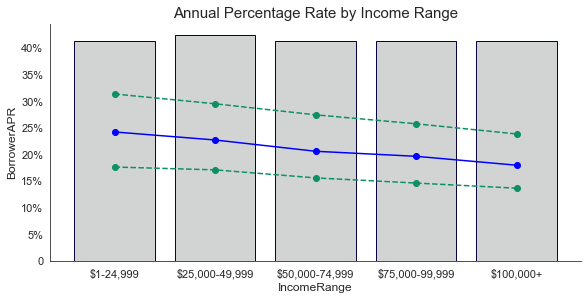

In [18]:
plt.figure(figsize=(8,4), tight_layout=True)
loans_median(cat = income_max,
             title = 'Annual Percentage Rate by Income Range',
            x_var = 'IncomeRange')
sb.lineplot(data = income_median, x = 'IncomeRange', y = 'BorrowerAPR', color = '#0100FF')
sb.lineplot(data = income_75, x = 'IncomeRange', y = 'BorrowerAPR', linestyle='--', color = '#0D9164')
sb.lineplot(data = income_25, x = 'IncomeRange', y = 'BorrowerAPR', linestyle='--', color = '#0D9164');
points(income_median, colors[1])
points(income_75, colors[0])
points(income_25, colors[0])

## Annual Percentage Rate vs Income Range by Credit Score
Both credit score and level of income affect the decisions of lenders about a percentage rate. However, credit scores play a more important role in the evaluation of borrowers than the level of income. Change in percentage rate responds more steeply to changes in credit score than to changes in income level.

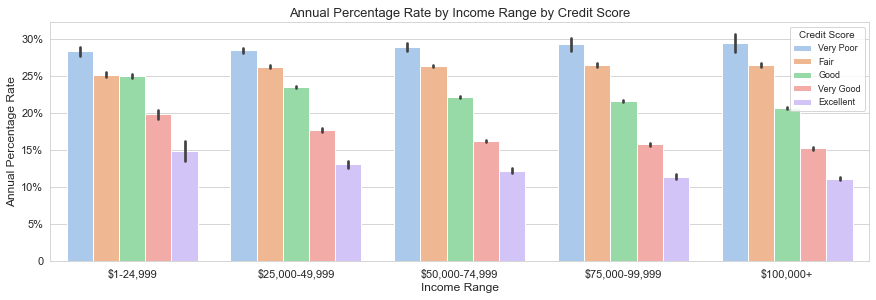

In [19]:
#Create a clustered bar chart
sb.set_style('whitegrid')
plt.figure(figsize=(12,4), tight_layout=True)
sb.barplot(data = loans, x = 'IncomeRange', y= 'BorrowerAPR', hue='CreditScore', palette='pastel');
plt.legend(title='Credit Score', title_fontsize='10', loc='upper right', prop={'size': 9})
ticks = [0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
labels = [0, '5%', '10%', '15%', '20%', '25%', '30%']
plt.ylabel('Annual Percentage Rate');
plt.xlabel('Income Range');
plt.title('Annual Percentage Rate by Income Range by Credit Score')
plt.yticks(ticks, labels);

## Annual Percentage Rate vs Original Loan Amount by Good and Excellent Credit Score
In theory annual percentage rate decreases when the amount of the loan increases, i.e negative correlation. Surprisingly, for those borrowers who have an excellent credit score, the percentage rate increases when the loan amount increases. This may be due to the discounts offered by lenders to attract more creditworthy borrowers.

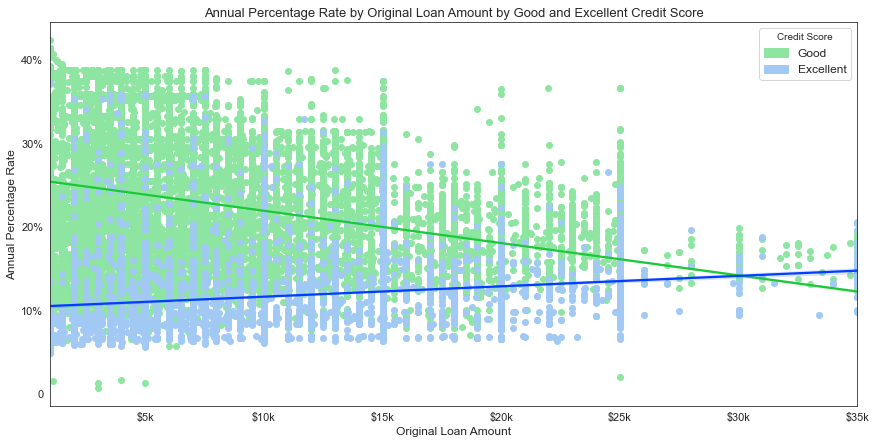

In [20]:
#Create two scatter plots in one figure to make the comparison more visible
import matplotlib.patches as patch
sb.set_style('white')
plt.figure(figsize=(12,6), tight_layout=True)
base_color = sb.color_palette('pastel')
line_color = sb.color_palette('bright')
plt.subplot(1,1,1)
sb.regplot(data = loans.query('CreditScore == "Good"'), x = 'LoanOriginalAmount', y = 'BorrowerAPR',
           scatter_kws = {'alpha': 1/1}, line_kws={"color": line_color[2]}, color = base_color[2])
plt.subplot(1,1,1)
sb.regplot(data = loans.query('CreditScore == "Excellent"'), x = 'LoanOriginalAmount', y = 'BorrowerAPR',
           scatter_kws = {'alpha': 1/1}, line_kws={"color": line_color[0]}, color = base_color[0]);
green = patch.Patch(color=base_color[2], label='Good')
blue = patch.Patch(color=base_color[0], label='Excellent')
plt.legend(handles=[green, blue], title='Credit Score', title_fontsize='10', loc='upper right', prop={'size': 12});
yticks = [0, 0.10, 0.20, 0.30, 0.40]
ylabels = [0, '10%', '20%', '30%', '40%']
plt.yticks(yticks, ylabels);
xticks = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
xlabels = ['$5k', '$10k', '$15k', '$20k', '$25k', '$30k', '$35k']
plt.xticks(xticks, xlabels)
plt.ylabel('Annual Percentage Rate');
plt.xlabel('Original Loan Amount');
plt.title('Annual Percentage Rate by Original Loan Amount by Good and Excellent Credit Score');

In [21]:
Excellent = loans.query('CreditScore == "Excellent"')
Good = loans.query('CreditScore == "Good"')

In [22]:
Excellent.LoanOriginalAmount.describe()

count     4422.000000
mean     11379.464948
std       7649.726346
min       1000.000000
25%       5000.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

In [23]:
xbin_edges = np.arange(1000, 35000 + 1000, 400)
xbin_centers = xbin_edges[:-1] +200

In [24]:
amount_binned_exc = pd.cut(Excellent['LoanOriginalAmount'], xbin_edges, include_lowest = True)
amount_binned_good = pd.cut(Good['LoanOriginalAmount'], xbin_edges, include_lowest = True)

In [25]:
pct_mean_exc = Excellent['BorrowerAPR'].groupby(amount_binned_exc).mean()
pct_mean_good = Good['BorrowerAPR'].groupby(amount_binned_good).mean()

## Annual Percentage Rate vs Original Loan Amount by Good and Excellent Credit Score
In theory annual percentage rate decreases when the amount of the loan increases, i.e negative correlation. Surprisingly, for those borrowers who have an excellent credit score, the percentage rate increases when the loan amount increases. This may be due to the discounts offered by lenders to attract more creditworthy borrowers.

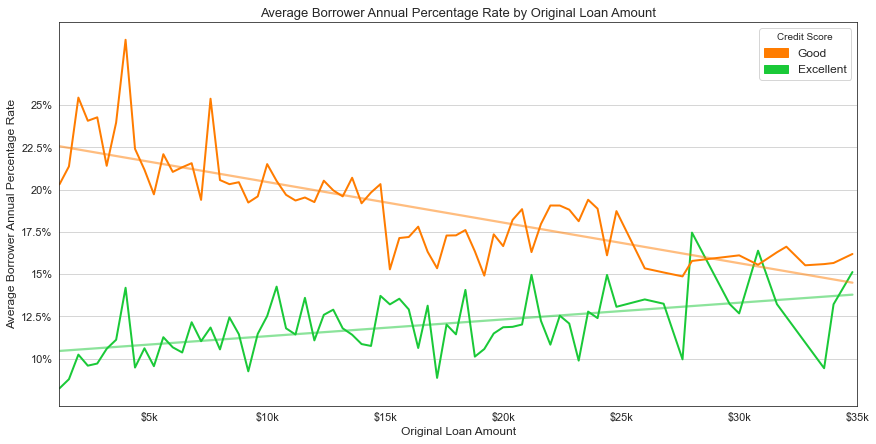

In [51]:
plt.figure(figsize=(12,6), tight_layout=True)
color = sb.color_palette()
sb.lineplot(x = xbin_centers, y = pct_mean_exc, lw = 2, color = line_color[2])
sb.regplot(x = xbin_centers, y = pct_mean_exc, scatter = False, ci = 0, line_kws={"color": line_color[2], "alpha": 1/2})
sb.regplot(x = xbin_centers, y = pct_mean_good, scatter = False, ci = 0, line_kws={"color": line_color[1], "alpha": 1/2})
sb.lineplot(x = xbin_centers, y = pct_mean_good, lw = 2, color = line_color[1])
green = patch.Patch(color=line_color[1], label='Good')
blue = patch.Patch(color=line_color[2], label='Excellent')
plt.legend(handles=[green, blue], title='Credit Score', title_fontsize='10', loc='upper right', prop={'size': 12});
ticks = [0.10, 0.125, 0.15, 0.175, 0.20, 0.225, 0.25]
labels = ['10%', '12.5%', '15%', '17.5%', '20%', '22.5%', '25%']
plt.yticks(ticks, labels)
xticks = [5000, 10000, 15000, 20000, 25000, 30000, 35000]
xlabels = ['$5k', '$10k', '$15k', '$20k', '$25k', '$30k', '$35k']
plt.xticks(xticks, xlabels)
plt.title('Average Borrower Annual Percentage Rate by Original Loan Amount')
plt.ylabel('Average Borrower Annual Percentage Rate')
plt.xlabel('Original Loan Amount')
plt.grid(axis='y');

In [52]:
! jupyter nbconvert presentation_ver3.ipynb --to slides --post serve --template output_toggle

^C
